In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load first dataset

In [ ]:
df1=pd.read_csv('phone.csv')


In [37]:
df1

,Rating,Review
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,4,It works good but it goes slow sometimes but i...
3,4,Great phone to replace my lost phone. The only...
4,1,I already had a phone with problems... I know ...
...,...,...
161294,4,works great and picks up signal in place my ot...
161295,5,"Great phone. Large keys, best flip phone I hav..."
161296,5,"Pros...Works great, very durable, easy to navi..."
161297,5,just as described perfect for the price


## Load second dataset

In [3]:
df2=pd.read_csv('merged.csv')

In [44]:
df2

,Review,Rating
0,Love the material and style - a very versitile...,4.0
1,I ordered this after reading through the revie...,2.0
2,Really liked how it fit. I will definitely bu...,5.0
3,"I love the print and design, the photo does no...",4.0
4,This is a perfect sweater to dress up or dress...,5.0
...,...,...
51112,Not a slim fit,1.0
51113,"Prompt delivery, great value for money.",5.0
51114,I love it! the fit is very flattering. i read ...,5.0
51115,There is no structure. It fits more like a swe...,2.0


## Merge both dataset

In [4]:
df = pd.concat([df1, df2], ignore_index=True)

In [7]:
df

,Rating,Review
0,2.0,I received the phone in record time however it...
1,5.0,I found very good is 100% recommended hope to ...
2,1.0,"Bought phone April 30, screen went completely ..."
3,5.0,I ordered this phone for a friend and she is t...
4,4.0,Muy buenos equipos y nokia perfectos no tengo ...
...,...,...
212411,5.0,Works great; fast shipping!
212412,4.0,I love it! It is cool looking and durable.
212413,5.0,I received the phone with operation manual boo...
212414,1.0,Defective! !!!!!! On arrival. This device came...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212416 entries, 0 to 212415
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Rating  212202 non-null  float64
 1   Review  211585 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


## removing null , duplicate , non english rows

In [10]:
df = df.dropna(subset=['Review'])
df = df.dropna(subset=['Rating'])

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
conflicting_reviews = df.groupby('Review')['Rating'].nunique()
conflicting_reviews = conflicting_reviews[conflicting_reviews > 1].index
df = df[df['Review'].isin(conflicting_reviews) == False]

In [13]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [14]:
df.reset_index(drop=True, inplace=True)

In [16]:
df

,Rating,Review
0,2.0,I received the phone in record time however it...
1,5.0,I found very good is 100% recommended hope to ...
2,1.0,"Bought phone April 30, screen went completely ..."
3,5.0,I ordered this phone for a friend and she is t...
4,4.0,Muy buenos equipos y nokia perfectos no tengo ...
...,...,...
208409,5.0,Works great; fast shipping!
208410,4.0,I love it! It is cool looking and durable.
208411,5.0,I received the phone with operation manual boo...
208412,1.0,Defective! !!!!!! On arrival. This device came...


In [ ]:
import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return 'unknown'

# Apply language detection
df['language'] = df['Review'].apply(detect_language)


In [ ]:
# Count non-English reviews
non_english_count = df[df['language'] != 'en'].shape[0]


language_counts = df['language'].value_counts()

print("Non-English reviews:", non_english_count)
print("\nLanguage distribution:\n", language_counts)


Non-English reviews: 10816

Language distribution:
 language
en         197598
es           2940
af           1133
fr            971
ca            719
ro            610
de            535
pt            450
it            379
so            377
no            320
nl            283
da            237
cy            218
tl            201
sl            196
et            168
vi            138
sv            122
unknown        98
sq             95
id             89
hr             88
pl             73
sk             72
hu             66
fi             58
sw             49
tr             49
cs             44
lt             17
lv             16
uk              3
ru              2
Name: count, dtype: int64


In [ ]:
df = df[df['language'] == 'en'].drop(columns=['language'])

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df

,Rating,Review
0,2.0,I received the phone in record time however it...
1,5.0,I found very good is 100% recommended hope to ...
2,1.0,"Bought phone April 30, screen went completely ..."
3,5.0,I ordered this phone for a friend and she is t...
4,3.0,The charger that came with the phone causes th...
...,...,...
197593,5.0,Works great; fast shipping!
197594,4.0,I love it! It is cool looking and durable.
197595,5.0,I received the phone with operation manual boo...
197596,1.0,Defective! !!!!!! On arrival. This device came...


In [24]:
df['Rating'].value_counts()

Rating
5.0    97191
1.0    35072
4.0    32113
3.0    18944
2.0    14278
Name: count, dtype: int64

## Create Balanced and Imbalanced dataset

In [26]:
#creating balanced data
balanced_df = df.groupby('Rating').apply(lambda x: x.sample(n=10000, random_state=42)).reset_index(drop=True)

#adding a column key
df['key'] = df.astype(str).agg('-'.join, axis=1)
balanced_df['key'] = balanced_df.astype(str).agg('-'.join, axis=1)

# Remove balanced rows to get remaining using key column
remaining_df = df[~df['key'].isin(balanced_df['key'])].drop(columns='key')
balanced_df = balanced_df.drop(columns='key')


base_2_star = 4278



target_counts = {
    2: base_2_star,                # 1x
    1: int(1.5 * base_2_star),     # 1.5x
    3: int(2.5 * base_2_star),       # 2.5x
    4: int(3 * base_2_star),       # 3x
    5: int(2 * base_2_star),       # 2x
}


imbalanced_parts = []

for rating, target in target_counts.items():
    subset = remaining_df[remaining_df['Rating'] == rating]
    replace = target > len(subset)  # only upsample if not enough data
    sampled = subset.sample(n=target, replace=replace, random_state=42)
    imbalanced_parts.append(sampled)


imbalanced_df = pd.concat(imbalanced_parts).reset_index(drop=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25720\3146858866.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Rating').apply(lambda x: x.sample(n=10000, random_state=42)).reset_index(drop=True)


In [36]:
# Check overlap between balanced and imbalanced datasets
overlap = pd.merge(balanced_df, imbalanced_df, how='inner')
print("Number of duplicate rows between balanced and imbalanced:", len(overlap))

Number of duplicate rows between balanced and imbalanced: 0


In [27]:
balanced_df

,Rating,Review
0,1.0,This product is pretty good overall but I can'...
1,1.0,the cellphone is very slow specially the inter...
2,1.0,Phone wouldn't make calls not really sure if i...
3,1.0,The cell phone turned on and now it goes out a...
4,1.0,It's a tmobile version of xperia not a sony fa...
...,...,...
49995,5.0,Great phone. Big improvement over my previous ...
49996,5.0,I bought the red and it is gorgeous. i love ho...
49997,5.0,My father love the phone.
49998,5.0,I bought the navy polka dot top and i love the...


In [28]:
imbalanced_df

,Rating,Review
0,2.0,"Personal, for me. I didn’t know the material w..."
1,2.0,Phone would not allow any kind of download. ch...
2,2.0,Worked OK except the small outside screen woul...
3,2.0,Anytime you see a top reviewer giving a produc...
4,2.0,Looked nice out of the package but not worth t...
...,...,...
42775,5.0,A good product .... Thanks for it.
42776,5.0,"Love this too! Fits great, washes well and doe..."
42777,5.0,Work good with Map quest not with Google map. ...
42778,5.0,This Nokia Lumia 820 unlocked GSM phone is wor...


## Visualization of balanced dataset

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25720\2428083184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=balanced_df, palette='viridis')


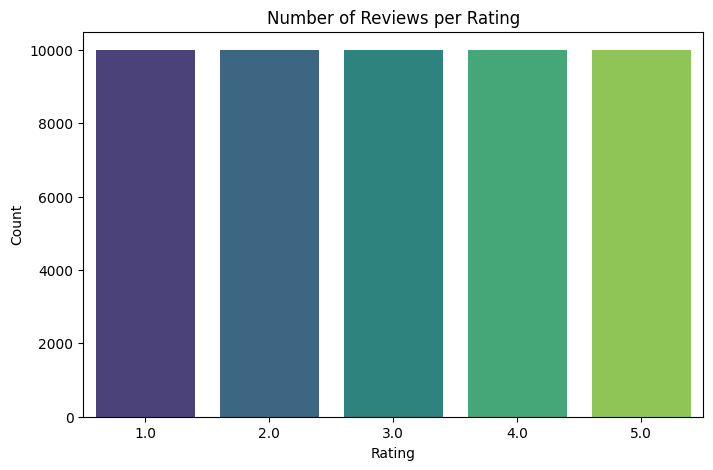

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=balanced_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

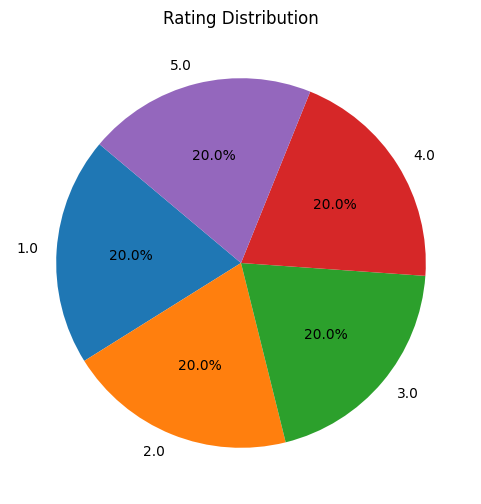

In [31]:
rating_counts = balanced_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

## Visualization of imbalanced dataset

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25720\2685128881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=imbalanced_df, palette='viridis')


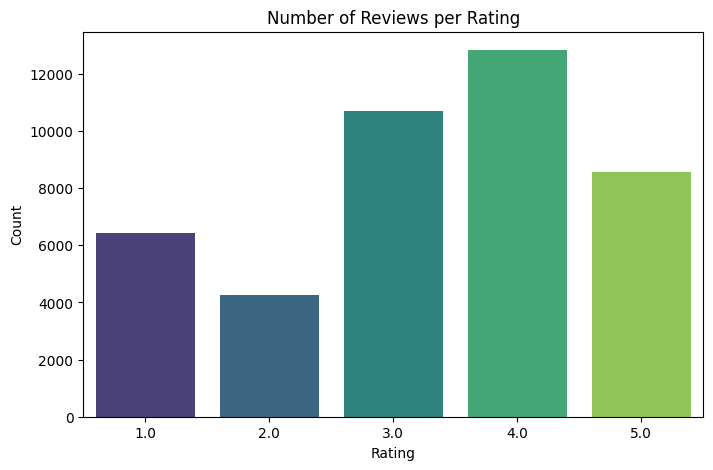

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=imbalanced_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

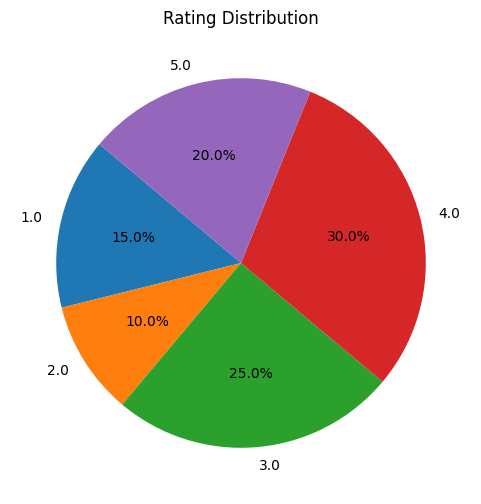

In [33]:
rating_counts = imbalanced_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

## save both dataset

In [34]:
balanced_df.to_csv("balanced_data_for_DL.csv", encoding="utf-8-sig")

In [35]:
imbalanced_df.to_csv("imbalanced_data_for_DL.csv", encoding="utf-8-sig")